### Group members: Assignment 3 : Customer churn

* Birva PankajKumar Chudasama 200596766
* Ezekiel Oluwagbemileke Ilori 
* Kishan Dayanand Nishad


## Problem Statement
### Briefly describe the problem solved in the assignment.
- Develop a Convolutional Neural Network (CNN) and Neural Network (CNN) models to predict customer churn based on historical customer data. 
- Evaluate model performance, and provide actionable insights based on the features that contribute most to customer churn

### Assumptions
- Dataset is not cleaned
- EDA needs to be done
### Constraints
- Python
- Dataset [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- sklearn, tensorflow

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Step 1: Understand distributions and data types
print("Dataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

### Observations
* The dataset includes demographic, account, and service details of customers.
* The SeniorCitizen column is binary, with only 16.2% of customers being seniors.
* Tenure ranges from 0 to 72 months, with a median value of 29 months.
* Monthly charges vary between $18.25  and  $118.75, with a mean of $64.76.


In [4]:
data.groupby(['DeviceProtection']).sum()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
DeviceProtection,,,,,,,,,,,,,,,,,,,,
No,7590-VHVEG3668-QPYBK9237-HQITU1452-KIOVK6713-O...,FemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFe...,624,YesNoNoNoNoNoYesYesYesNoYesYesNoNoYesNoYesYesY...,NoNoNoYesNoYesYesNoYesNoYesYesYesNoYesNoYesYes...,73342,NoYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesY...,No phone serviceNoNoYesNo phone serviceNoNoYes...,DSLDSLFiber opticFiber opticDSLDSLDSLDSLDSLDSL...,NoYesNoNoYesYesYesNoYesYesNoNoNoNoYesNoNoYesYe...,YesYesNoYesNoYesNoYesYesYesYesYesNoNoYesNoYesY...,NoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNo...,NoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoYesYesNo...,NoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoN...,Month-to-monthMonth-to-monthMonth-to-monthMont...,YesYesYesYesNoNoYesYesNoYesYesNoYesNoNoYesNoYe...,Electronic checkMailed checkElectronic checkCr...,218510.25,29.85108.15151.651949.4301.93487.95587.453505....,NoYesYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoNoNo...
No internet service,7469-LKBCI8191-XWSZG1680-VDCWW1066-JKSGK7310-E...,MaleFemaleMaleMaleMaleFemaleFemaleFemaleFemale...,52,NoNoYesNoNoYesYesYesYesYesYesYesYesYesNoNoNoYe...,NoNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoYesY...,46615,YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...,NoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoN...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,No internet serviceNo internet serviceNo inter...,No internet serviceNo internet serviceNo inter...,No internet serviceNo internet serviceNo inter...,No internet serviceNo internet serviceNo inter...,No internet serviceNo internet serviceNo inter...,Two yearOne yearOne yearMonth-to-monthMonth-to...,NoNoNoNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoN...,Credit card (automatic)Mailed checkBank transf...,32166.85,326.81022.95202.2520.1520.2418.25894.3930.9109...,NoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNo...
Yes,5575-GNVDE7795-CFOCW9305-CDSKC7892-POOKP8091-T...,MaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFema...,466,NoNoNoYesYesNoNoYesNoYesNoNoYesYesYesYesNoNoNo...,NoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoYe...,108033,YesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYes...,NoNo phone serviceYesYesYesYesNoYesYesNoNoNo p...,DSLDSLFiber opticFiber opticFiber opticFiber o...,YesYesNoNoNoNoYesYesYesNoNoNoYesYesNoYesNoNoNo...,NoNoNoNoNoYesNoYesNoNoYesNoYesYesNoYesNoYesNoY...,NoYesNoYesNoNoYesYesNoYesNoNoYesYesNoYesNoNoNo...,NoNoYesYesYesYesYesYesYesNoNoNoYesNoYesNoNoYes...,NoNoYesYesYesYesYesYesYesNoYesYesYesNoYesNoNoY...,One yearOne yearMonth-to-monthMonth-to-monthOn...,NoNoYesYesNoYesYesNoNoNoYesYesYesYesYesNoYesYe...,Mailed checkBank transfer (automatic)Electroni...,205439.50,1889.51840.75820.53046.055681.15036.32686.0578...,NoNoYesYesNoYesNoNoNoYesNoYesNoNoNoNoNoYesYesN...


In [5]:
data_need_to_boolean = ['Partner', 'Dependents',  'PhoneService', 'PaperlessBilling']

In [6]:
# Step 2: Clean the Data


data['TotalCharges'] = data['TotalCharges'].replace('', np.nan) 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# # Encode categorical variables using one-hot encoding
categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

data['TotalCharges'].isnull().sum()

11

In [7]:
indices_to_drop = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

# Drop the rows from the DataFrame
data = data.drop(indices_to_drop)

C:\Users\ilori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


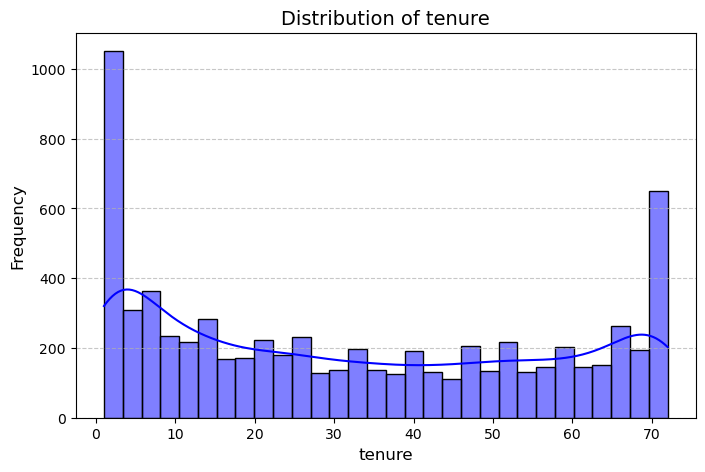

C:\Users\ilori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


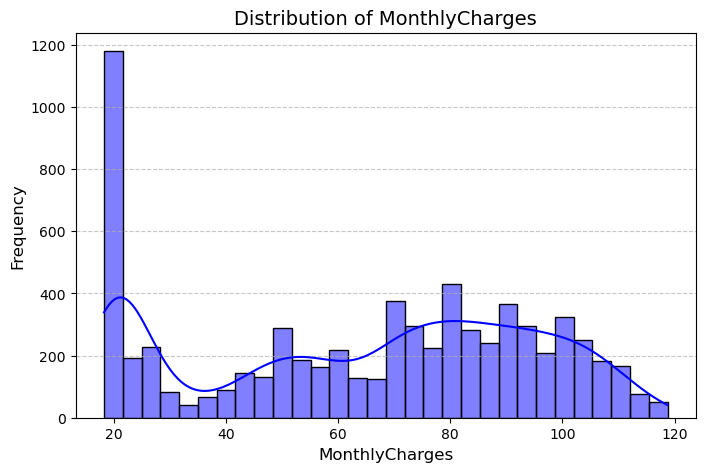

C:\Users\ilori\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


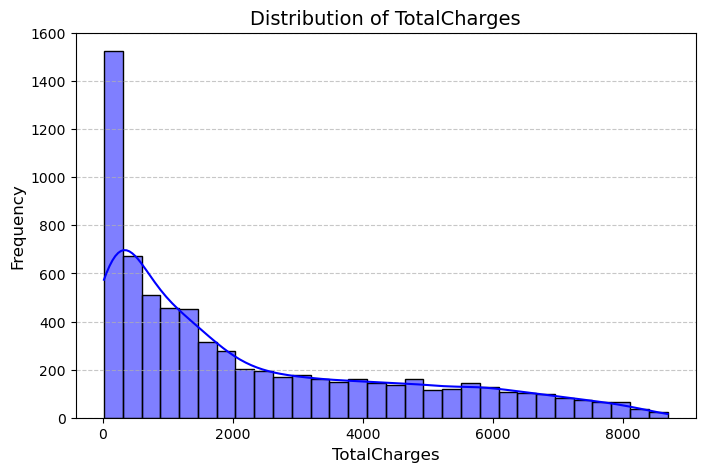

In [8]:
# Step 3: Perform EDA
# Numerical Distributions
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



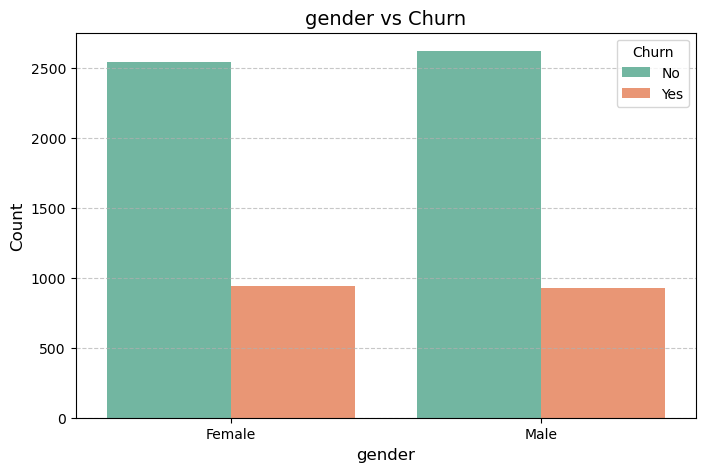

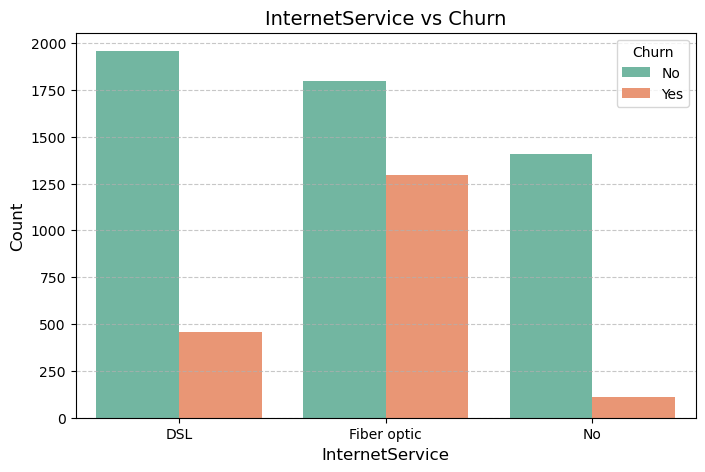

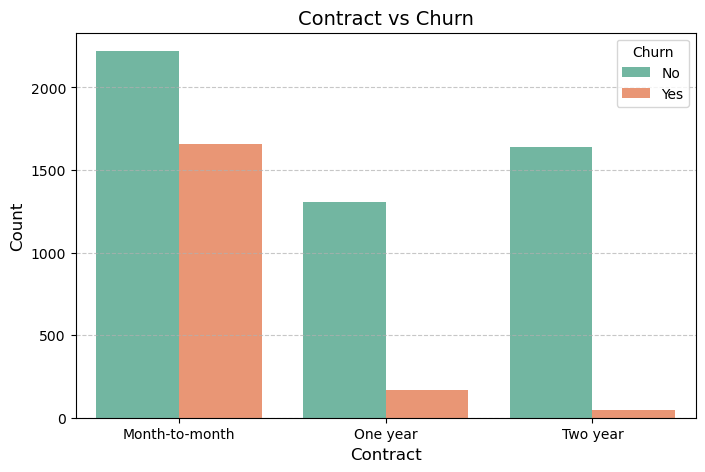

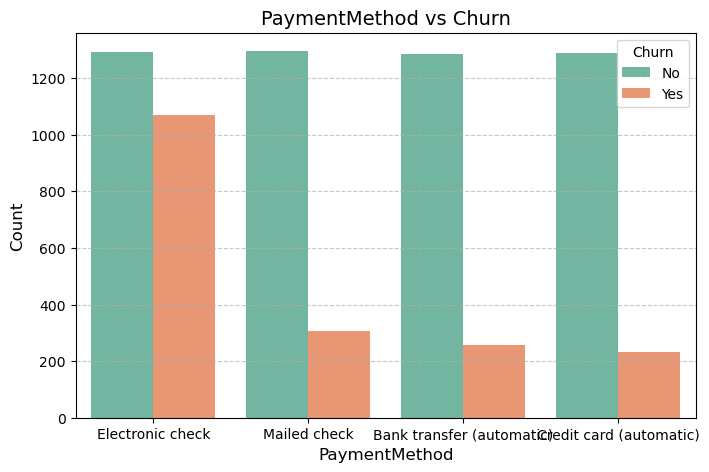

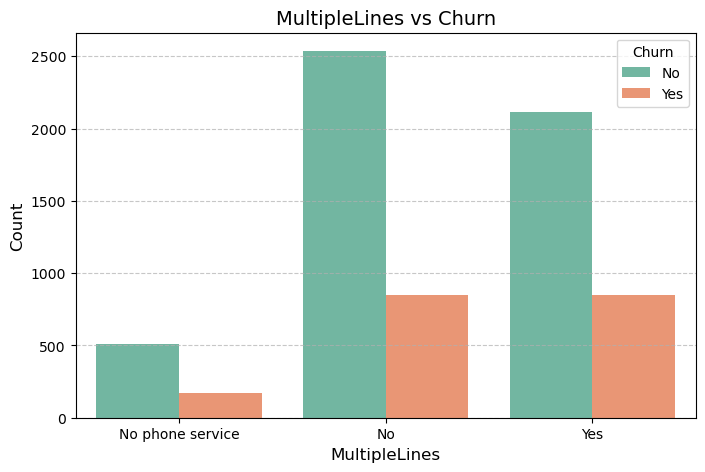

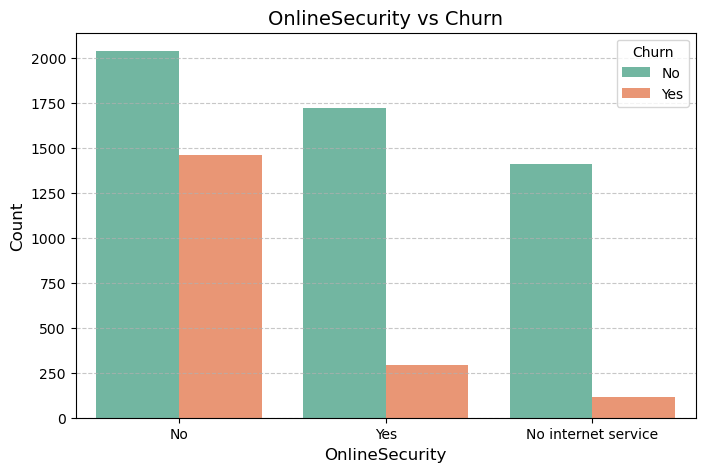

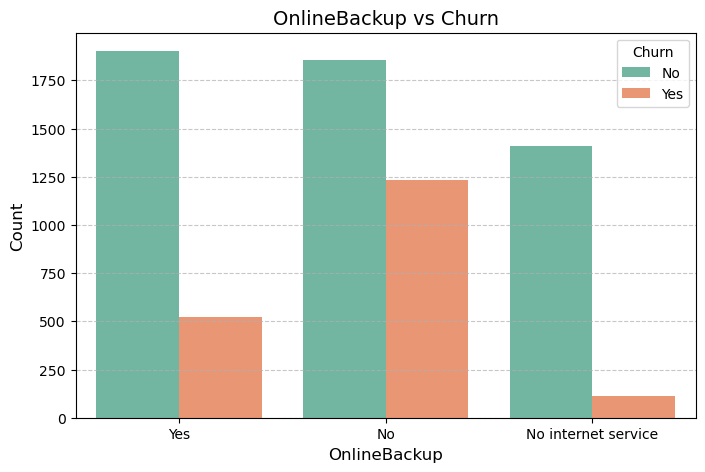

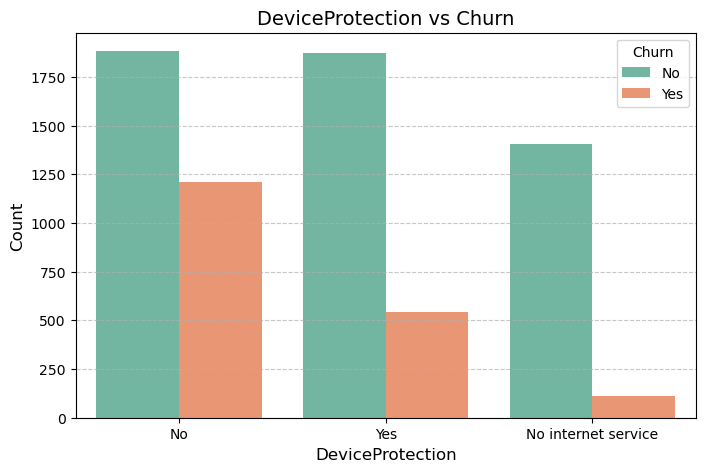

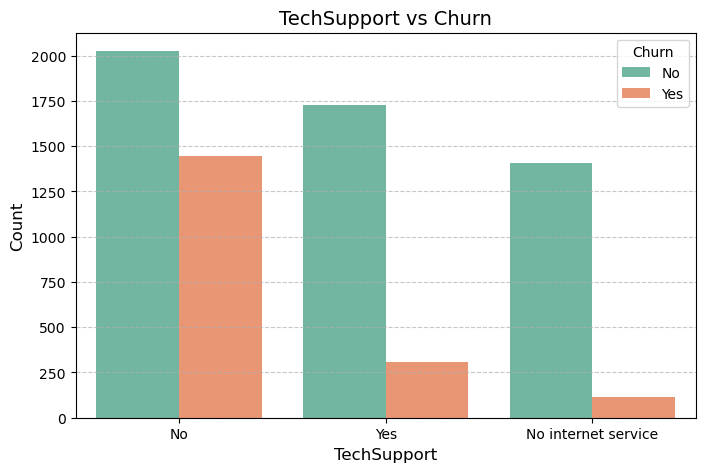

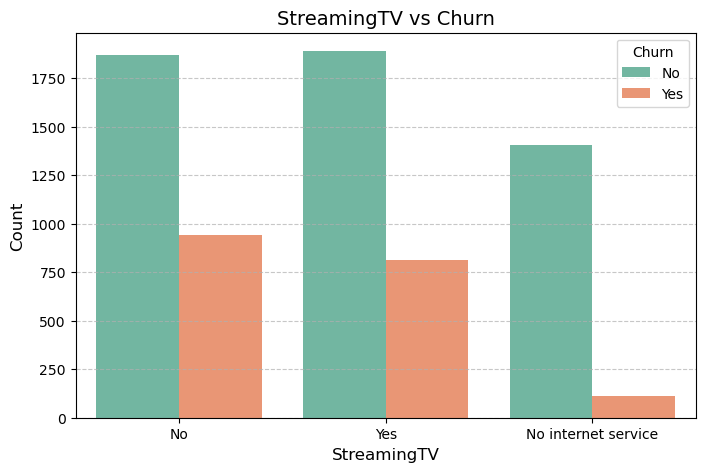

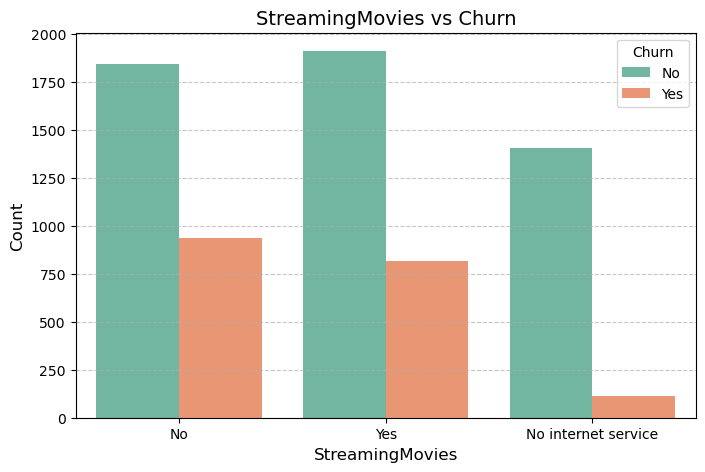

In [9]:
# Relationships with categorical features
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=column, hue='Churn', palette='Set2')
    plt.title(f"{column} vs Churn", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

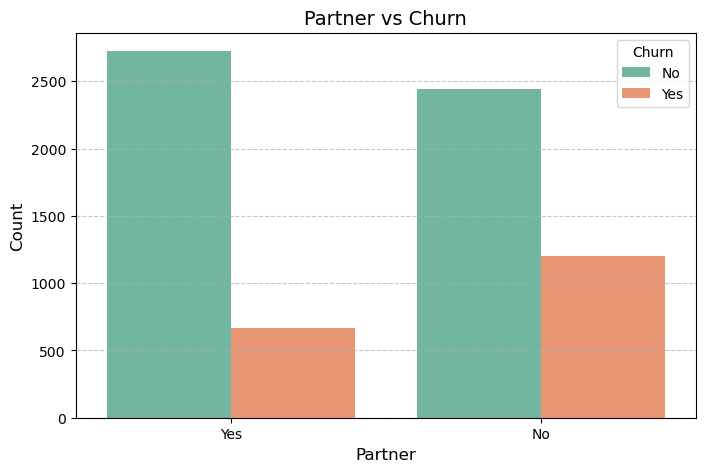

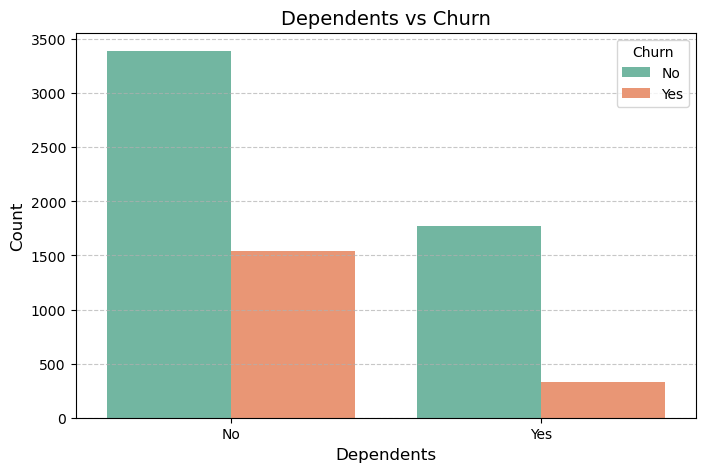

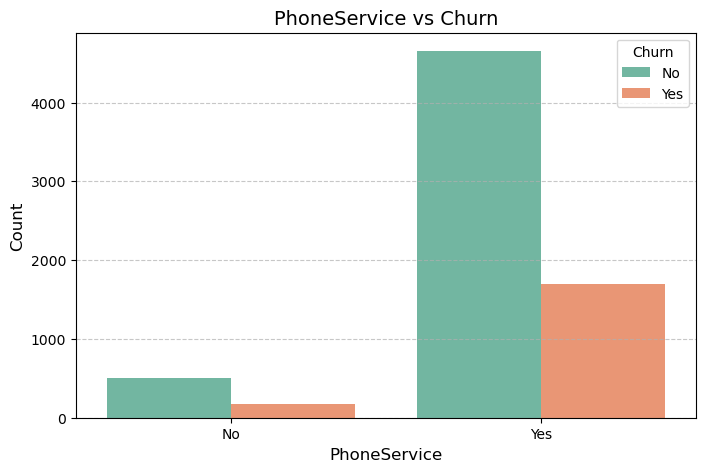

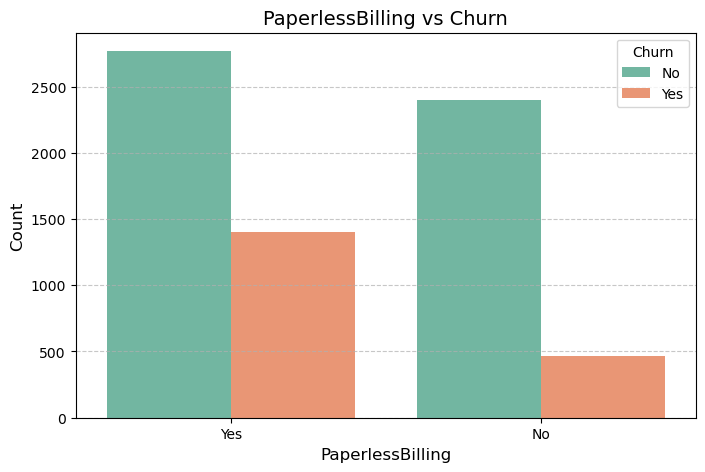

In [10]:
# Relationships with boolean features
for column in data_need_to_boolean:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=column, hue='Churn', palette='Set2')
    plt.title(f"{column} vs Churn", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [11]:
data.drop(columns = ['customerID', 'MultipleLines','PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'InternetService'], inplace = True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
categorical_columns = ['Contract', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaymentMethod']
boolean_columns = ['Partner', 'Dependents', 'PaperlessBilling']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns + boolean_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
     remainder='passthrough'
)


transformed_data = preprocessor.fit_transform(data)
column_names = preprocessor.get_feature_names_out()

column_names = np.char.replace(column_names.astype(str), 'cat__', '')
column_names = np.char.replace(column_names, 'num__', '')
column_names = np.char.replace(column_names, 'remainder__', '')

transformed_df = pd.DataFrame(transformed_data, columns=column_names)

#Label Encoding the target `Churn` 
transformed_df['Churn'] = transformed_df['Churn'].map({'Yes': 1, 'No': 0})

transformed_df.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,...,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,-1.280248,-1.161694,-0.994194,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.064303,-0.260878,-0.17374,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.239504,-0.363923,-0.959649,0,1
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.512486,-0.74785,-0.195248,0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.239504,0.196178,-0.940457,0,1


In [13]:
for col in numerical_columns:
    transformed_df[col] = pd.to_numeric(transformed_df[col], errors='coerce')


object_columns = transformed_df.select_dtypes(include='object').columns

# Convert these columns to int
transformed_df[object_columns] = transformed_df[object_columns].astype(int)
transformed_df.dtypes

transformed_df.dtypes

Contract_Month-to-month                      int32
Contract_One year                            int32
Contract_Two year                            int32
OnlineSecurity_No                            int32
OnlineSecurity_No internet service           int32
OnlineSecurity_Yes                           int32
OnlineBackup_No                              int32
OnlineBackup_No internet service             int32
OnlineBackup_Yes                             int32
DeviceProtection_No                          int32
DeviceProtection_No internet service         int32
DeviceProtection_Yes                         int32
TechSupport_No                               int32
TechSupport_No internet service              int32
TechSupport_Yes                              int32
PaymentMethod_Bank transfer (automatic)      int32
PaymentMethod_Credit card (automatic)        int32
PaymentMethod_Electronic check               int32
PaymentMethod_Mailed check                   int32
Partner_No                     

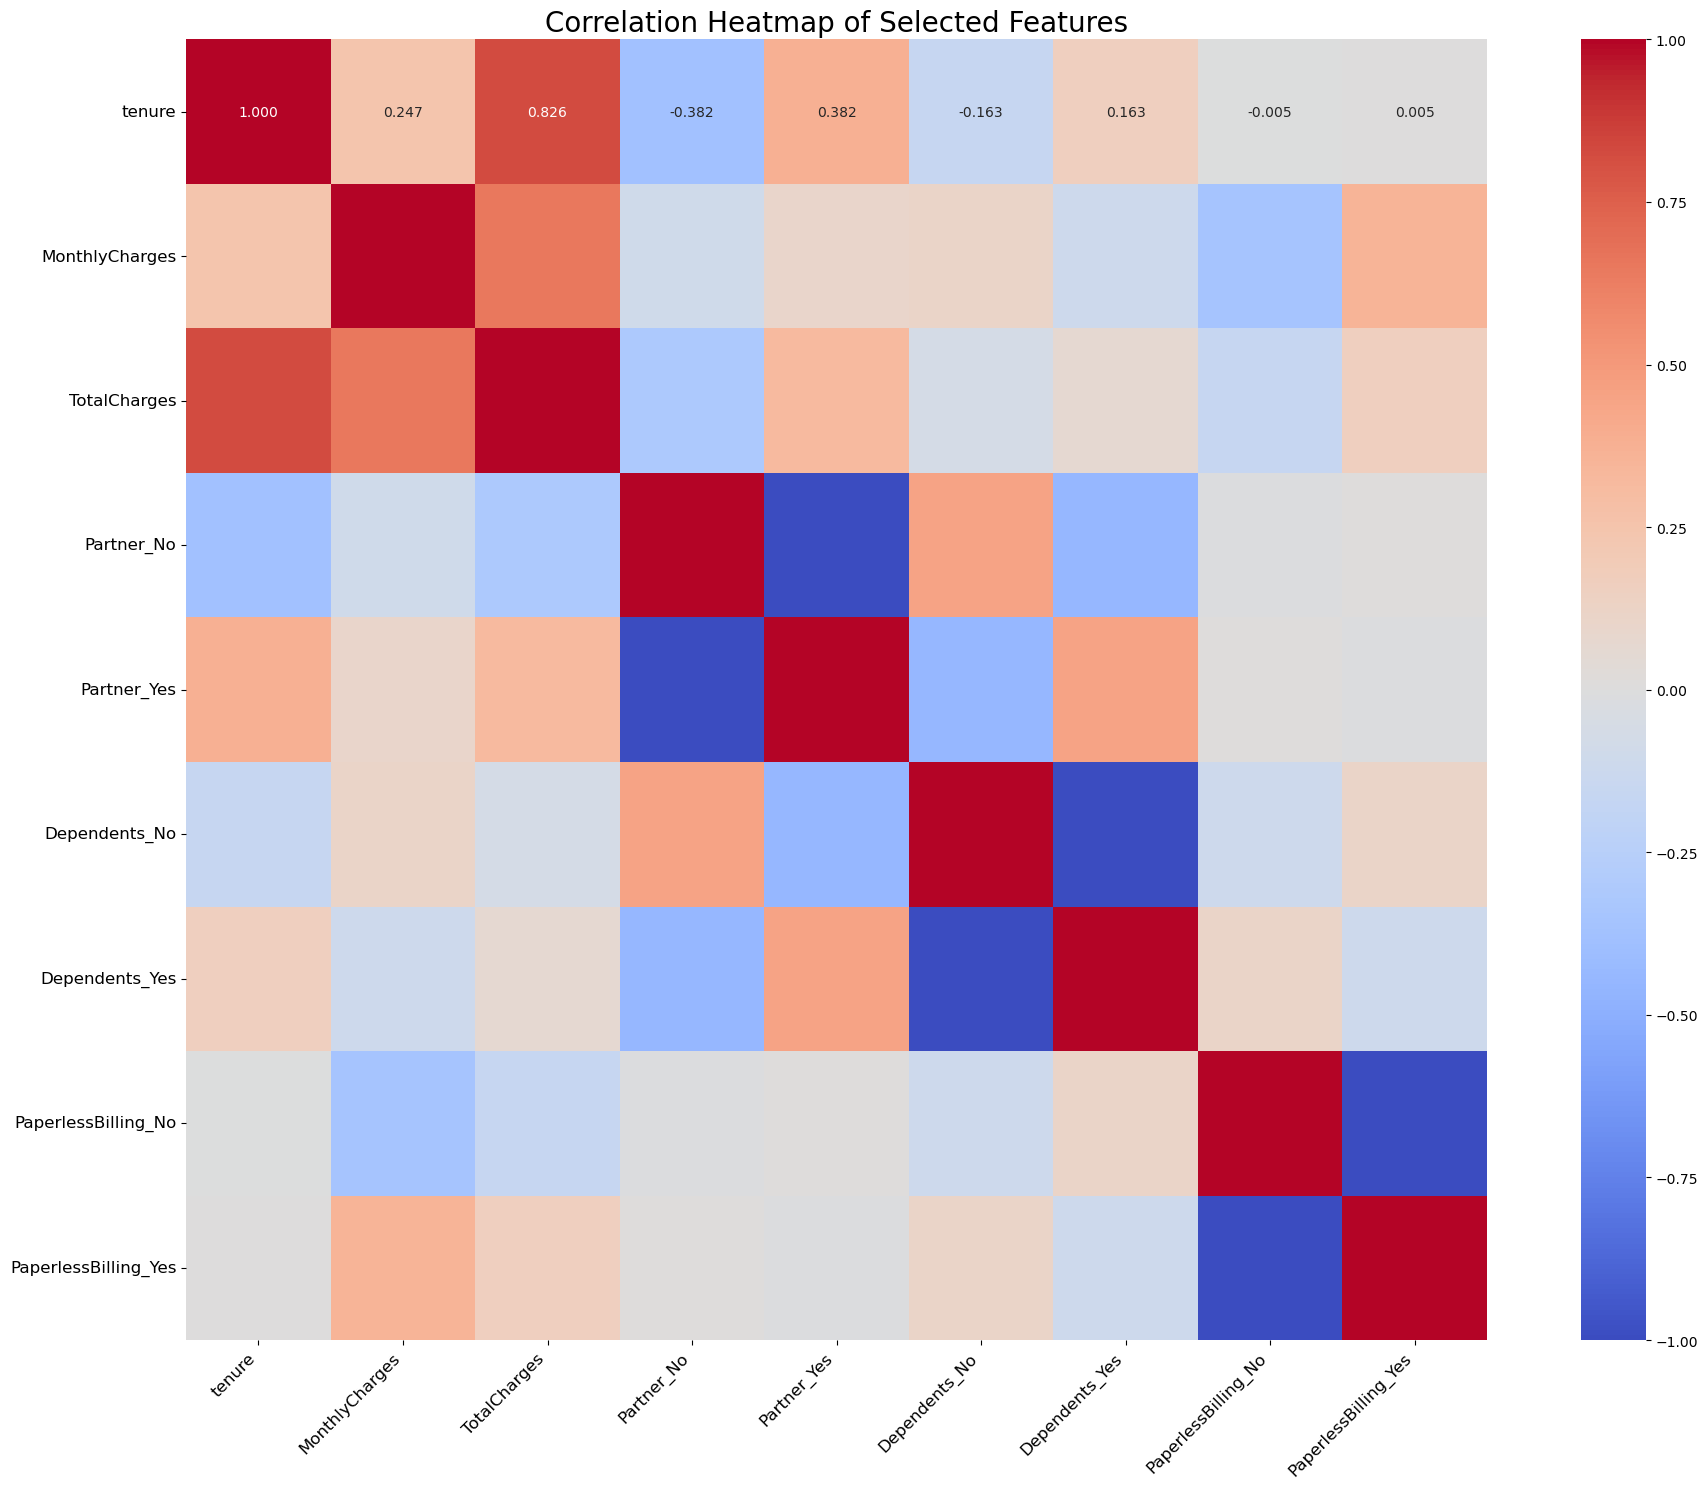

In [14]:
import seaborn as sns

boolean_columns = ['Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PaperlessBilling_No','PaperlessBilling_Yes']
numeric_data = transformed_df[numerical_columns + boolean_columns]


# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))  # Adjust figure size for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,        # Display correlation coefficients
    fmt=".3f",         # Format coefficients to 2 decimal places
    cmap="coolwarm",   # Colormap for better aesthetics
    cbar=True,         # Include a color bar
    square=True        # Make cells square for consistency
)

# Add titles and labels
plt.title("Correlation Heatmap of Selected Features", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout() 
plt.show()


In [15]:
# model building
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = transformed_df.drop(columns=['Churn'])  # Features
y = transformed_df['Churn']                # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)



Training Features Shape: (5625, 29)
Testing Features Shape: (1407, 29)
Training Labels Shape: (5625,)
Testing Labels Shape: (1407,)


In [16]:
# model 1 nn
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_nn = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print("Neural Network Test Accuracy:", nn_accuracy)


Epoch 1/10


C:\Users\ilori\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7525 - loss: 0.4937 - val_accuracy: 0.8089 - val_loss: 0.4111
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4399 - val_accuracy: 0.8098 - val_loss: 0.4031
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4124 - val_accuracy: 0.8000 - val_loss: 0.4114
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4165 - val_accuracy: 0.8089 - val_loss: 0.3976
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4229 - val_accuracy: 0.8044 - val_loss: 0.4008
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4184 - val_accuracy: 0.8062 - val_loss: 0.4008
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8039 - loss: 0.4174 - val_accuracy: 0.8009 - val_loss: 0.4006
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8080 - loss: 0.4100 - val_accuracy: 0.8107 - val_

In [17]:
from tensorflow.keras.layers import Conv1D, Flatten, Reshape
tf.random.set_seed(None)
np.random.seed(None)

# Reshape the input features for Conv1D
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN model on the test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("Convolutional Neural Network Test Accuracy:", cnn_accuracy)


Epoch 1/10


C:\Users\ilori\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7502 - loss: 0.4902 - val_accuracy: 0.8116 - val_loss: 0.4123
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7876 - loss: 0.4341 - val_accuracy: 0.7813 - val_loss: 0.4311
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7928 - loss: 0.4251 - val_accuracy: 0.8116 - val_loss: 0.4003
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7992 - loss: 0.4153 - val_accuracy: 0.8062 - val_loss: 0.4036
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7890 - loss: 0.4393 - val_accuracy: 0.8116 - val_loss: 0.3936
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8035 - loss: 0.4167 - val_accuracy: 0.8151 - val_loss: 0.3924
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8124 - loss: 0.4048 - val_accuracy: 0.8116 - val_loss: 0.3967
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.4316 - val_accuracy: 0.8044 - val_

 ## Analysis of Metrics :
 
 ### 1.  Neural Network (NN) Performance
Advantages for Tabular Data:

Neural Networks are designed for tabular data with fully connected layers, effectively learning feature relationships without needing spatial awareness.

Test Accuracy: CNN achieved 79.74% better than NN's 78.39%.
Validation Accuracy: CNN maintained a higher validation accuracy of 79.45% compared to NN's 78.37%.
NN had a slightly lower loss than CNN, both during training and testing.
Lower Computational Complexity:

NN has a simpler architecture with fewer layers and parameters, making it faster to train and less prone to overfitting on small datasets.
The CNN outperformed the NN in terms of accuracy  but the difference is minimal.



### Why the NN Performed Greatly
Feature Relationships: Fully connected layers in NN are ideal for learning feature relationships in tabular data.
Simplicity: The simpler architecture reduced the risk of overfitting and required fewer computational resources.
Inappropriate Architecture for CNN: CNNs struggled to find spatial patterns in data where little to none existed

In [18]:
# Predict probabilities and binary classes
y_pred_probs = nn_model.predict(X_test).flatten()  # Predicted probabilities
y_pred = (y_pred_probs > 0.4).astype(int)          # Binary predictions (threshold = 0.4)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc)



Accuracy: 0.7910447761194029
Precision: 0.6075268817204301
Recall: 0.6042780748663101
F1-Score: 0.6058981233243967
AUC: 0.8298631782203333


 
### model achieves **79% accuracy**, correctly predicting 79% of the cases overall.
- A **precision of 60.75%** indicates that, of all predicted churn cases, 60.75% are actual churners.
- A **recall of 60.42%** means the model captures 60.42% of actual churners, demonstrating a balanced performance for identifying positive cases.
- The **F1-Score of 60.58%** reflects a strong balance between precision and recall.
- The **AUC of 82.99%** indicates excellent discriminatory power between churners and non-churners.


### Classification report OF NN



In [23]:
# Classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.60      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



### Confusion matrix of  NN

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(
    conf_matrix, 
    columns=["Predicted Negative", "Predicted Positive"], 
    index=["Actual Negative", "Actual Positive"]
)
print('\nConfusion Matrix:')
print(conf_mat_df)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 887                 146
Actual Positive                 148                 226


### 2. Convolutional Neural Network (CNN) Performance

CNNs are primarily designed for data with spatial structure (e.g., images, where adjacent pixels are related).
In tabular data, spatial relationships are absent or minimal, so convolutional layers do not provide much additional value.
While the CNN still performed reasonably better, its loss metrics were slightly worse than the NN due to this mismatch in architecture suitability.
Additional Overhead:

CNNs involve more parameters and require more computation time due to convolutional and pooling operations, which were unnecessary for this dataset.



In [24]:
# Predict probabilities and binary classes
y_pred_probs = cnn_model.predict(X_test).flatten()  # Predicted probabilities
y_pred = (y_pred_probs > 0.4).astype(int)          # Binary predictions (threshold = 0.4)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [25]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc)



Accuracy: 0.7789623312011372
Precision: 0.5730858468677494
Recall: 0.660427807486631
F1-Score: 0.613664596273292
AUC: 0.8339994098493044


### Classification report of CNN

In [26]:
# Classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1033
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407



### Confusion matrix of  CNN

In [27]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(
    conf_matrix, 
    columns=["Predicted Negative", "Predicted Positive"], 
    index=["Actual Negative", "Actual Positive"]
)
print('\nConfusion Matrix:')
print(conf_mat_df)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 849                 184
Actual Positive                 127                 247


### 3. Choice of Model
Based on the results and dataset characteristics:


The Convolutional Neural Network (CNN) is the gave a better result but too minial compared to NN
We will choose NN model because:
It aligns better with the tabular nature of the dataset.
It require less computational power compare to CNN